In [ ]:
!pip install openpyxl
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#df =pd.read_excel('satisfaction_2015.xlsx', index_col=0)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path ="/content/gdrive/MyDrive/Colab Notebooks/My_Data/satisfaction_2015.xlsx"
df = pd.read_excel(path, index_col=0)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df.shape

(129880, 23)

In [ ]:
df.head()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,,,
117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,0,4,3,0,3,3,1,5,3,3,4,3,0,0.0
72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,1,4,2,1,3,2,1,1,4,4,3,2,0,0.0
29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,0,4,3,0,3,3,3,5,3,2,3,3,0,0.0
81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,0,3,4,0,4,4,5,4,5,5,5,4,0,0.0
83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,0,3,3,5,3,3,3,4,5,3,4,3,0,0.0


In [ ]:
df.columns

Index(['satisfaction_v2', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 117135 to 10198
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction_v2                    129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.satisfaction_v2)
print(le.classes_)
df.satisfaction_v2 = le.transform(df.satisfaction_v2)

['neutral or dissatisfied' 'satisfied']


# Checking for Imbalance
* We can see that 43.45% of the customer satisfied with the flight service while the remain 56.55% tent to feel neutral or dissatisfied with the service

Text(0.5, 1.0, 'Satisfaction Indicator (0) and (1) in the Dataset')

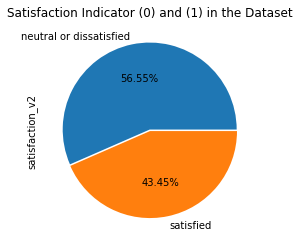

In [ ]:
satis_count = df['satisfaction_v2'].value_counts('normalized')
ax = satis_count.plot(kind='pie', explode=(0.018,0), labels=['neutral or dissatisfied','satisfied'], autopct='%1.2f%%')
# set the title
ax.set_title('Satisfaction Indicator (0) and (1) in the Dataset')

# Features Exploratory

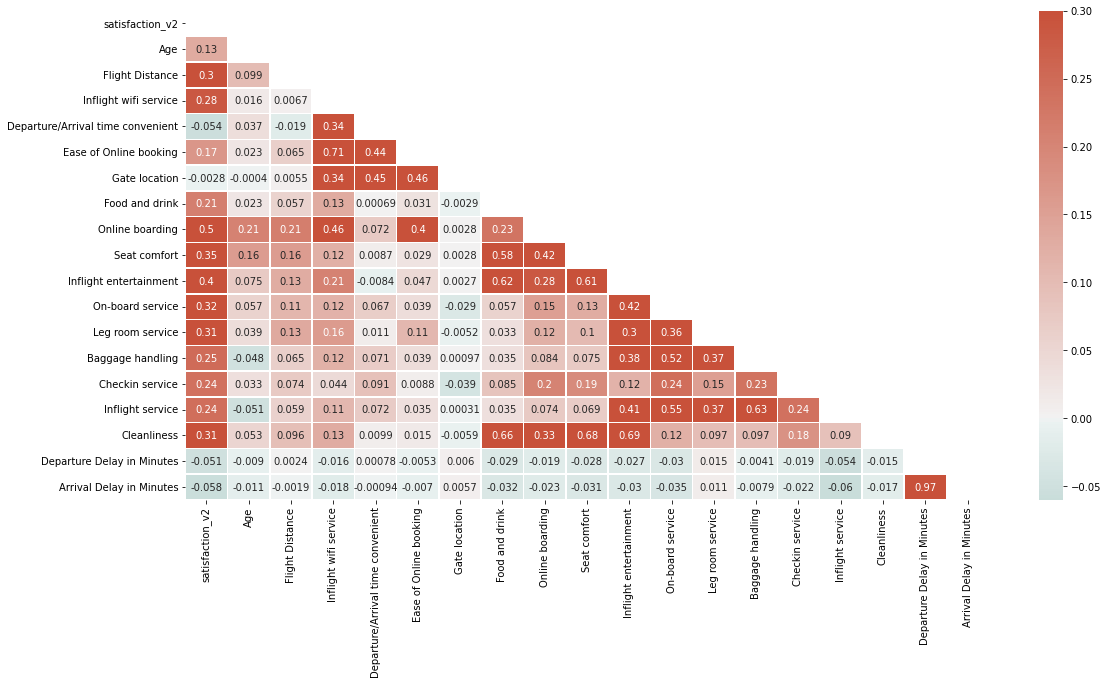

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(180, 18, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,linewidths=.5, annot=True)

In [ ]:
from scipy.stats import ttest_ind
ttest_ind(df['Departure Delay in Minutes'], df['Arrival Delay in Minutes'])

Ttest_indResult(statistic=nan, pvalue=nan)

# Handling of Missing Data
* We can see from the info summary above that only column: Arrival Delay in Minutes has missing 393 data.
* Since the missing data only a minor part of our dataset and it also closely correlated: 97% to Departure delay in Minutes, I would get rid of the whole column.


In [ ]:
df.isnull().sum()

satisfaction_v2                        0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [ ]:
delay_minute = df['Arrival Delay in Minutes']
delay_minute.isnull().sum()

393

In [ ]:
df = df.dropna(axis=1)
df.shape

(129880, 22)

# Exploratory Data Analysis

## Object type data
* Including 4 features: Gender, Customer Type, Class, Type of Travel
* 3 of them only have 2 unique values and Class have 3. Thus, it would be easy for me to label encoding on all of them.

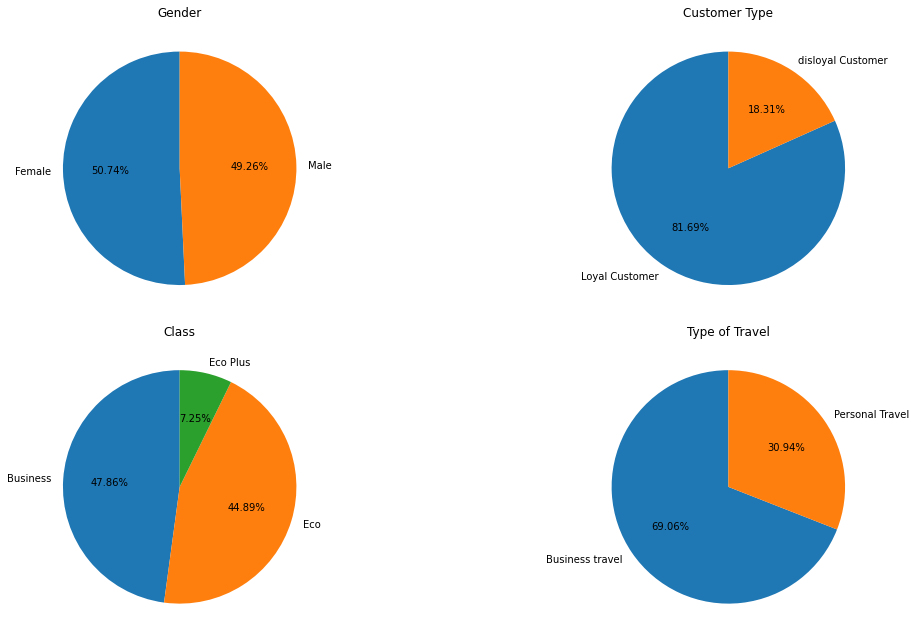

In [ ]:
# create a figure with four subplots
fig, ([ax1, ax2],[ax3, ax4]) = plt.subplots(2, 2,figsize=(18, 9))
# plot each pie chart in a separate subplot
ax1.pie(df['Gender'].value_counts('normalized'), autopct='%1.2f%%', labels=df['Gender'].value_counts('normalized').index,startangle = 90)
ax1.set_title('Gender')
ax2.pie(df['Customer Type'].value_counts('normalized'), autopct='%1.2f%%',labels=df['Customer Type'].value_counts('normalized').index,startangle = 90)
ax2.set_title('Customer Type')
ax3.pie(df['Class'].value_counts('normalized'), autopct='%1.2f%%', labels=df['Class'].value_counts('normalized').index,startangle = 90)
ax3.set_title('Class')
ax4.pie(df['Type of Travel'].value_counts('normalized'), autopct='%1.2f%%',labels=df['Type of Travel'].value_counts('normalized').index,startangle = 90)
ax4.set_title('Type of Travel')
plt.tight_layout()

**Gender**: It is observed that gender-wise distribution of dissatisfied and satisfied customers are quite same. For both male and female passengers, no. of dissatisfied customers are on the higher side compared to no. of satisfied customers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


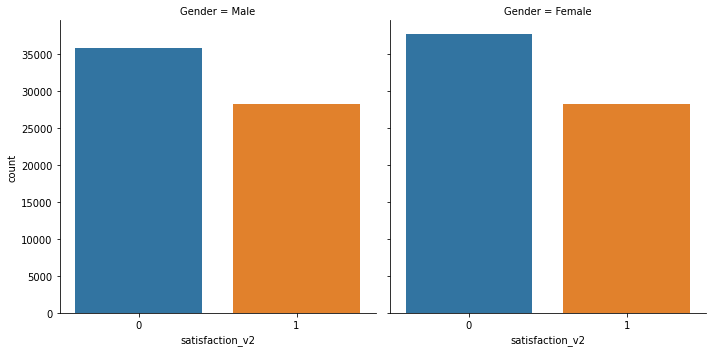

In [ ]:
sns.catplot("satisfaction_v2", col="Gender", data=df, kind="count", height=5, aspect=1.0)
plt.tight_layout()

**Customer Type**: Loyal passengers are very high in number. Even among loyal passengers, the ratio of satisfied and dissatidfied ones are almost 49:51. Most of our disloyal customer are disastisfied with our service. We could explore further in this subset of disatisfaction to see what we could improve. Moreover, our Loyal customer also dissatisfied a lot. And the amount also much greater and if we can target this subset it would be better since we can keep the customer using our service more.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


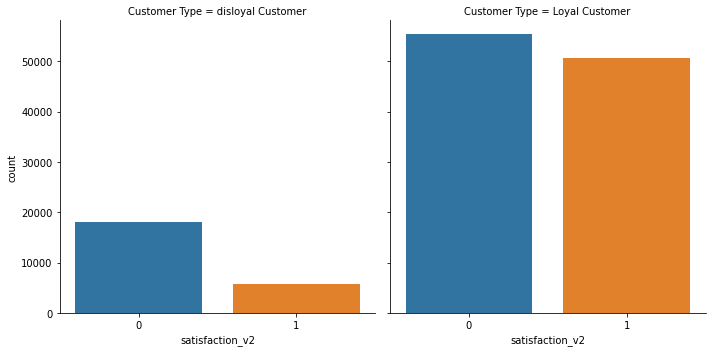

In [ ]:
sns.catplot("satisfaction_v2", col="Customer Type",  data=df, kind="count", height=5, aspect=1.0)
plt.tight_layout()

**Class**: 3 classes of customer: Eco, Bussiness and Eco Plus. For Eco and Bussiness class, we could see a huge gap between the satisfaction and disatisfaction in each class. People in Eco class tent to be fastidious and complain alot. On the other hands,
Bussiness class seems to be satisfied with that they paid for.This is reasonable since they, the Business class customer, spend more money on their ticket so they receive more convenient service. Last is Eco plus, which only takes a minority part, and their ratio also evenly distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


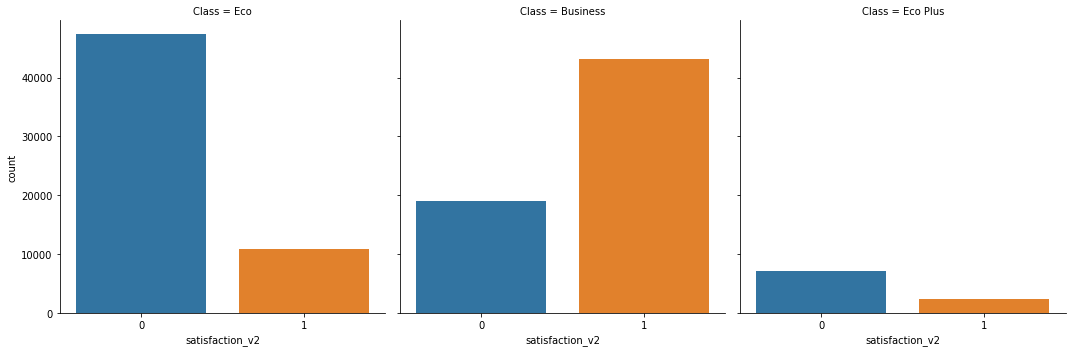

In [ ]:
sns.catplot("satisfaction_v2", col="Class", data=df, kind="count", height=5, aspect=1.0)
plt.tight_layout()

**Type of Travel**: The ratio of satisfied and dissatidfied of Personal travel is quite imballanced, most of it are dissatisfied. On the other sides, Bussiness travel give more satisfied feedback although since are are not spending their own money. However, the amount of customer give neutral to dissatisfied feedbacks are the same. Thus we should treat them as important since we are trying to improve our service quality

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


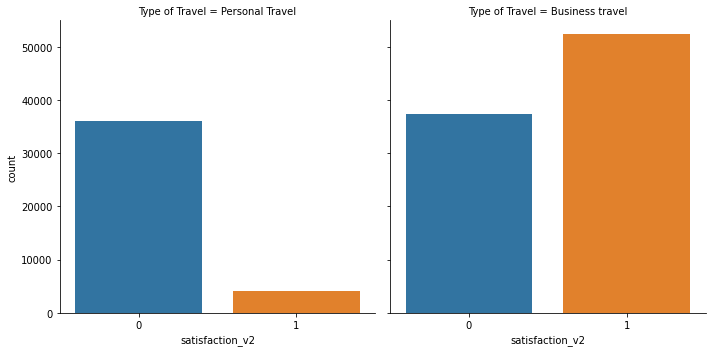

In [ ]:
sns.catplot("satisfaction_v2", col="Type of Travel", data=df, kind="count", height=5, aspect=1.0)
plt.tight_layout()

In [ ]:
# Encode gender
le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])
# Encode customer type
le.fit(df['Customer Type'])
df['Customer Type'] = le.transform(df['Customer Type'])
# Encode class
le.fit(df['Class'])
df['Class'] = le.transform(df['Class'])
# Encode type of travel
le.fit(df['Type of Travel'])
df['Type of Travel'] = le.transform(df['Type of Travel'])


## Check on correlation of the above features

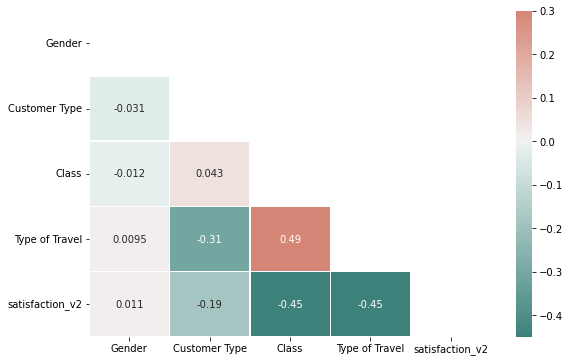

In [ ]:
new_df=df[['Gender','Customer Type','Class','Type of Travel','satisfaction_v2']]
# Compute the correlation matrix
corr = new_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(180, 18, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,linewidths=.5, annot=True)

## Low correlation data
* Including 3 features that its' absolute correlation to target value less than 0.1:  Departure/Arrival time convenient, Gate location, Departure delay in Minutes.
* These factor seems to distributed normal. Thus, we can let it in our model or leave it

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


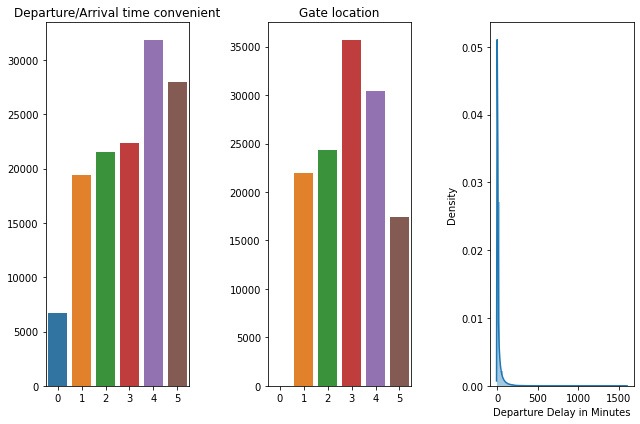

In [ ]:
# create a figure with four subplots
fig, ([ax1, ax2,ax3]) = plt.subplots(1,3,figsize=(9, 6))
# plot each bar chart in a separate subplot
sns.barplot(x=df['Departure/Arrival time convenient'].value_counts().index, y=df['Departure/Arrival time convenient'].value_counts().values,ax=ax1)
ax1.set_title('Departure/Arrival time convenient')
sns.barplot(x=df['Gate location'].value_counts().index, y=df['Gate location'].value_counts().values,ax=ax2)
ax2.set_title('Gate location')
sns.distplot(df['Departure Delay in Minutes'],ax=ax3)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


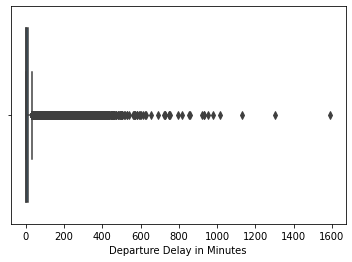

In [ ]:
sns.boxplot(df['Departure Delay in Minutes'])

## Other Features that is not score type
* EDA of all features:  Age, Flight Distance
* Older customer seems easier on the review than the youth.
* Interesting point is that long flight customer satisfied more than short flight. Most of the bad review comes from flight distance less than 1500km. We could divide flight distance into short and and long distance flight instead of using the number.

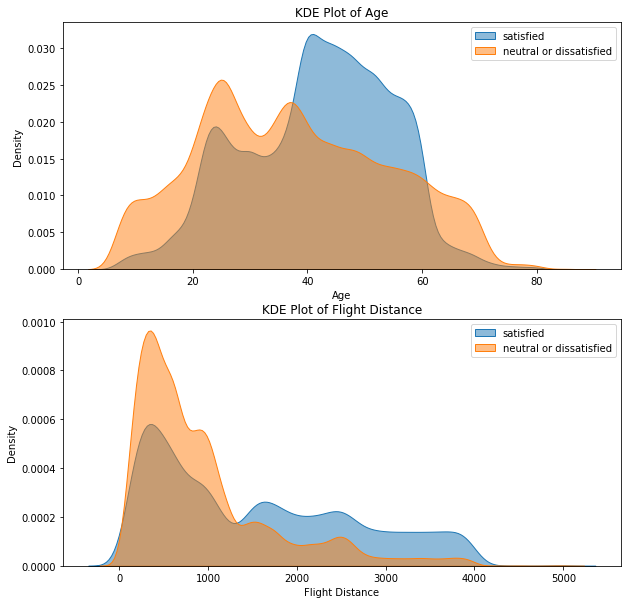

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.kdeplot(df.loc[df["satisfaction_v2"]==1]["Age"],alpha=0.5,label="satisfied",shade=True)
sns.kdeplot(df.loc[df["satisfaction_v2"]==0]["Age"],alpha=0.5,label="neutral or dissatisfied",shade=True)
plt.title("KDE Plot of Age")
plt.legend()

plt.subplot(2,1,2)
sns.kdeplot(df.loc[df["satisfaction_v2"]==1]["Flight Distance"],alpha=0.5,label="satisfied",shade=True)
sns.kdeplot(df.loc[df["satisfaction_v2"]==0]["Flight Distance"],alpha=0.5,label="neutral or dissatisfied",shade=True)
plt.title("KDE Plot of Flight Distance")
plt.legend()

# Modeling

## Logistic Regression

In [ ]:
df = df.reset_index()
df = df.drop('id',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   satisfaction_v2                    129880 non-null  int64
 1   Gender                             129880 non-null  int64
 2   Customer Type                      129880 non-null  int64
 3   Age                                129880 non-null  int64
 4   Type of Travel                     129880 non-null  int64
 5   Class                              129880 non-null  int64
 6   Flight Distance                    129880 non-null  int64
 7   Inflight wifi service              129880 non-null  int64
 8   Departure/Arrival time convenient  129880 non-null  int64
 9   Ease of Online booking             129880 non-null  int64
 10  Gate location                      129880 non-null  int64
 11  Food and drink                     129880 non-null  int64
 12  On

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop("satisfaction_v2",axis=1)
y = df["satisfaction_v2"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(90916, 21)
(38964, 21)


In [ ]:
feature_cols=X.columns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
y_pred= lr.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(lr)

Accuracy: 0.8724463607432502
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     21881
           1       0.87      0.83      0.85     17083

    accuracy                           0.87     38964
   macro avg       0.87      0.87      0.87     38964
weighted avg       0.87      0.87      0.87     38964

LogisticRegression(solver='liblinear')


## Fit with subset of important variables

In [ ]:
print(lr.intercept_, lr.coef_)

[-5.85883833] [[ 3.78887300e-02 -2.07100586e+00 -8.07905419e-03 -2.81158659e+00
  -5.49832803e-01 -3.41326478e-06  3.92550410e-01 -1.18853562e-01
  -1.42867385e-01  2.16617621e-02 -2.77072312e-02  6.14136725e-01
   6.99894895e-02  5.83428613e-02  3.02308887e-01  2.50004839e-01
   1.30208650e-01  3.25245199e-01  1.23498882e-01  2.19058512e-01
  -4.69959812e-03]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


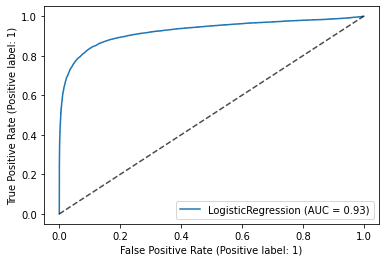

In [ ]:
from sklearn.metrics import plot_roc_curve
lr_disp = plot_roc_curve(lr, X_test, y_test)
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[19748  2133]
 [ 2837 14246]]


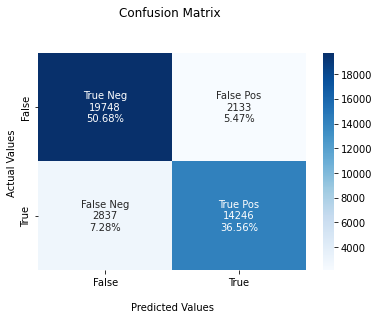

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred= tree.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9460014372241043
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     21881
           1       0.94      0.94      0.94     17083

    accuracy                           0.95     38964
   macro avg       0.94      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


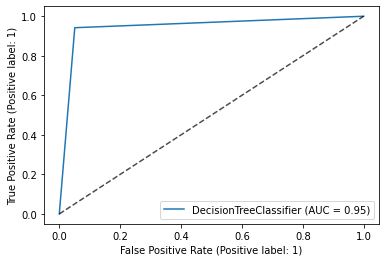

In [ ]:
from sklearn.metrics import plot_roc_curve
lr_disp = plot_roc_curve(tree, X_test, y_test)
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

[[20768  1113]
 [  991 16092]]


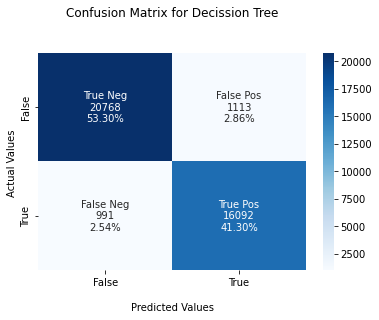

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Decission Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

As can be seen from the ROC curve and confusion matrix that we don't need to optimize the model since the performance of the model is at the optimal point. 
From the confusion matrix above, True positive rate is 41.25% of the whole dataset so that is 94.25% of the Positve Class. The Optimal point of the ROC curve is the turning point of 0.95 for True Positive. Thus, the performance of the model optimal.
Above that point, the false positive rate increase, causing a decrease of accuracy of negative class anf the total accuracy. Later on, we can see that many ensemble methods to optimize Decision Tree can not gain a better results. Therefore, we don't need to optimize the model to gain just a few perfercentage and trade off more misclassified data.




### Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import GridSearchCV
tree_param = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5,verbose=True)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15]},
             verbose=True)

In [ ]:
final_model = clf.best_estimator_
final_model

DecisionTreeClassifier(max_depth=15)

In [ ]:
y_pred= tree.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9460014372241043
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     21881
           1       0.94      0.94      0.94     17083

    accuracy                           0.95     38964
   macro avg       0.94      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964



In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[20768  1113]
 [  991 16092]]


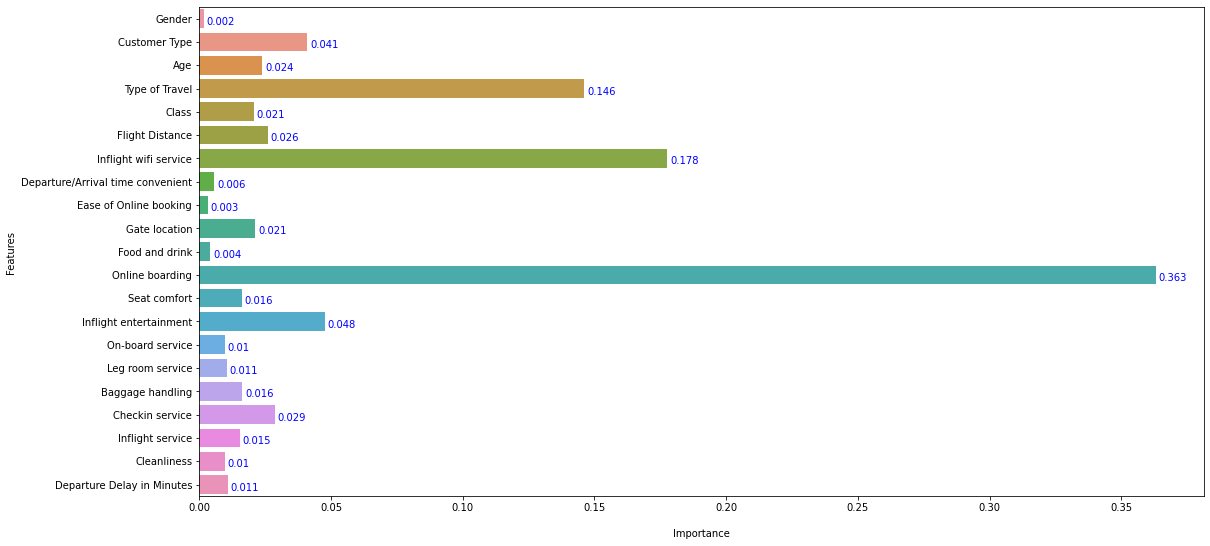

In [ ]:
fig, ax = plt.subplots(figsize=(18,9))
x=tree.feature_importances_
y= feature_cols
sns.barplot(x=x, y=y,ax=ax)
ax.set_xlabel('\nImportance')
ax.set_ylabel('Features ')
for i, v in enumerate(x):
    ax.text(v + 0.001, i + .25, str(round(v,3)), color='blue')

### Visualize Decision tree

In [ ]:
!pip install graphviz
!pip install pydotplus

In [ ]:
from sklearn.metrics import accuracy_score
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


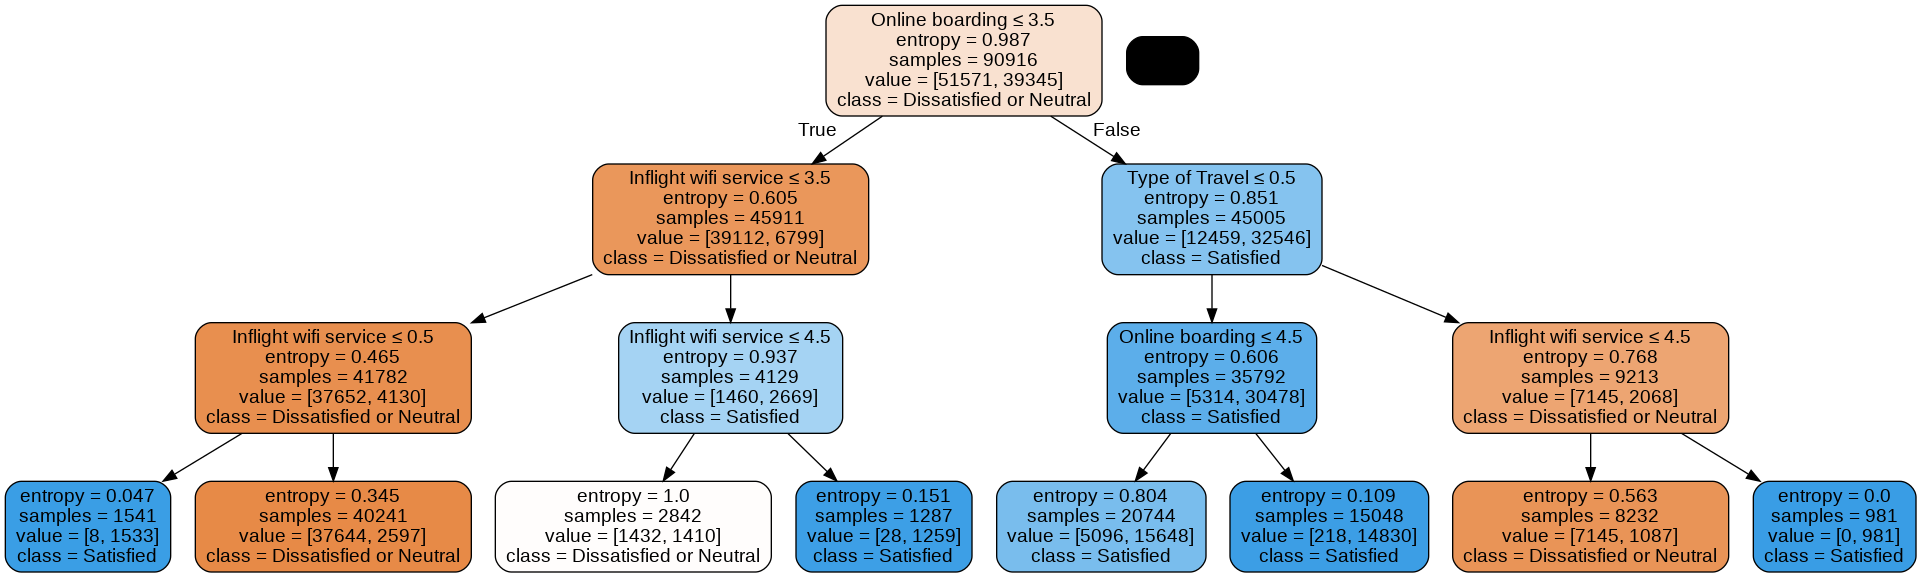

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Dissatisfied or Neutral','Satisfied'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('satisfaction.png')
Image(graph.create_png())

## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # Import Decision KNN Classifier
neigh = KNeighborsClassifier()
neigh.fit(X_train,y_train)
y_pred= neigh.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.759649933271738
              precision    recall  f1-score   support

           0       0.77      0.82      0.79     21881
           1       0.75      0.68      0.71     17083

    accuracy                           0.76     38964
   macro avg       0.76      0.75      0.75     38964
weighted avg       0.76      0.76      0.76     38964



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


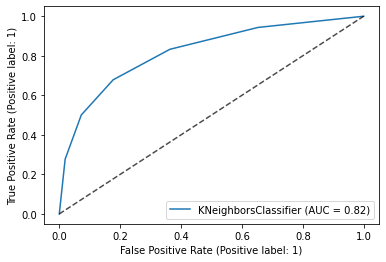

In [ ]:
from sklearn.metrics import plot_roc_curve
lr_disp = plot_roc_curve(neigh, X_test, y_test)
plt.plot([0,1],[0,1],"--",color="k",alpha=0.7)
plt.show()

[[18006  3875]
 [ 5490 11593]]


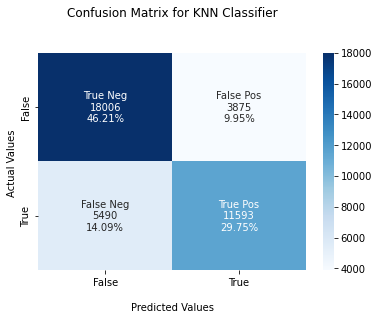

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for KNN Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Ensemble method
*  Ensemble models help in reducing the variance of some models. As the result, the variance in this model is quite consistence due to the fact that it all score(0-5) category.
* Due to the regularization of ensemble models, we can see it gives more importance on others data. However, the result is not improved at all. 
*  Here, all ensemble models is not surficient: More time to train but doesn't improve the result


### Random Forest
* Represent Bagging method 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred= tree.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9460014372241043
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     21881
           1       0.94      0.94      0.94     17083

    accuracy                           0.95     38964
   macro avg       0.94      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964



[[20768  1113]
 [  991 16092]]


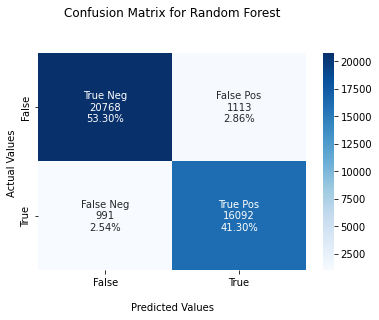

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

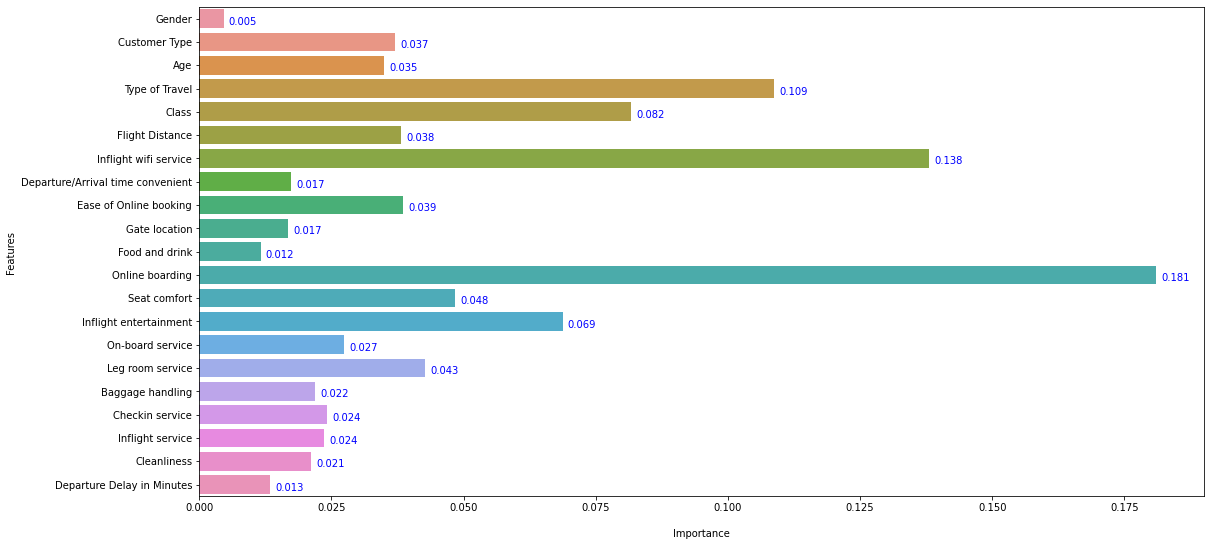

In [ ]:
fig, ax = plt.subplots(figsize=(18,9))
x=random_forest.feature_importances_
y= feature_cols
sns.barplot(x=x, y=y,ax=ax)
ax.set_xlabel('\nImportance')
ax.set_ylabel('Features ')
for i, v in enumerate(x):
    ax.text(v + 0.001, i + .25, str(round(v,3)), color='blue')

### AdaBoost
* Represent Boosting method

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train,y_train)
y_pred= ada_boost.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.925700646750847
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     21881
           1       0.92      0.91      0.91     17083

    accuracy                           0.93     38964
   macro avg       0.93      0.92      0.92     38964
weighted avg       0.93      0.93      0.93     38964



[[20541  1340]
 [ 1555 15528]]


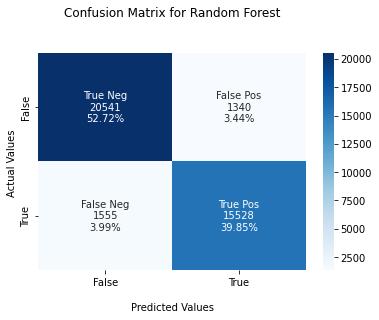

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

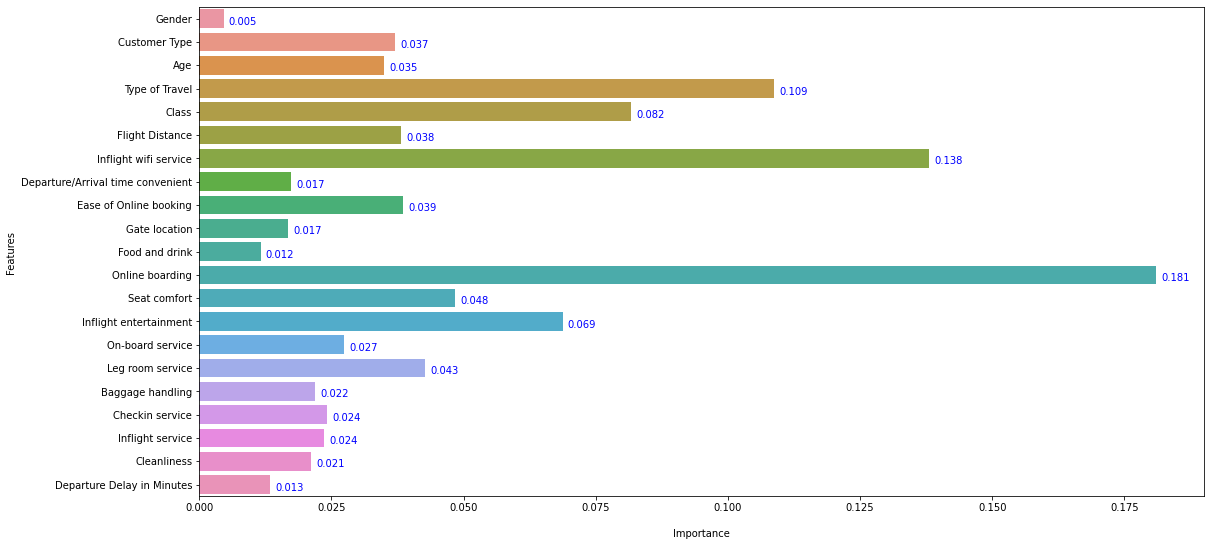

In [ ]:
fig, ax = plt.subplots(figsize=(18,9))
x=random_forest.feature_importances_
y= feature_cols
sns.barplot(x=x, y=y,ax=ax)
ax.set_xlabel('\nImportance')
ax.set_ylabel('Features ')
for i, v in enumerate(x):
    ax.text(v + 0.001, i + .25, str(round(v,3)), color='blue')

# Factor Analysis
* Sort the dataframe based on each factor using cut off value 0.2.

In [ ]:
from sklearn.decomposition import FactorAnalysis
fa_transformer = FactorAnalysis(n_components=5,rotation='varimax', random_state=0)
fa_transformer.fit(X)
components = fa_transformer.components_.T

In [ ]:
lmatrix = pd.DataFrame(components, index = feature_cols, columns = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5'])
lmatrix_sort=lmatrix.sort_values('Factor 1', ascending=False)
lmatrix_sort[lmatrix_sort['Factor 1'] >= 0.2]

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Flight Distance,997.448136,0.000167,0.001145,-0.000018,-0.000049
Age,1.503739,-0.136032,15.009982,-0.000846,-0.001672
Online boarding,0.290167,-0.026842,0.253367,-0.556171,-0.457859
Seat comfort,0.208001,-0.037383,0.190533,-0.021557,-0.944659


In [ ]:
lmatrix_sort=lmatrix.sort_values('Factor 2', ascending=False)
lmatrix_sort[lmatrix_sort['Factor 2'] >= 0.2]

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Departure Delay in Minutes,0.09144,38.057733,-0.010943,0.000066,0.000259


In [ ]:
lmatrix_sort=lmatrix.sort_values('Factor 3', ascending=False)
lmatrix_sort[lmatrix_sort['Factor 3'] >= 0.2]

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Age,1.503739,-0.136032,15.009982,-0.000846,-0.001672
Online boarding,0.290167,-0.026842,0.253367,-0.556171,-0.457859


In [ ]:
lmatrix_sort=lmatrix.sort_values('Factor 4', ascending=False)
lmatrix_sort[lmatrix_sort['Factor 4'] >= 0.1]

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5


In [ ]:
lmatrix_sort=lmatrix.sort_values('Factor 5', ascending=False)
lmatrix_sort[lmatrix_sort['Factor 5'] >= 0.2]

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5


# Further Analysis: Loyal Customer
* As we see above although we have a lot of loyal customer, the rate of disatisfaction still high. We need to see further what is the reason that cause our loyal customer to not satisfied with our service

In [ ]:
cust_df=df
cust_df = cust_df[cust_df['Customer Type']==0]
cust_df = cust_df.drop('Customer Type',axis=1)

Text(0.5, 1.0, 'Satisfaction of Loyal Customer')

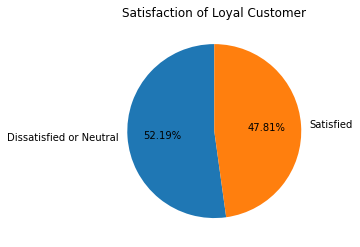

In [ ]:
plt.pie(cust_df['satisfaction_v2'].value_counts('normalized'), autopct='%1.2f%%', labels=['Dissatisfied or Neutral','Satisfied'],startangle = 90)
plt.title('Satisfaction of Loyal Customer')

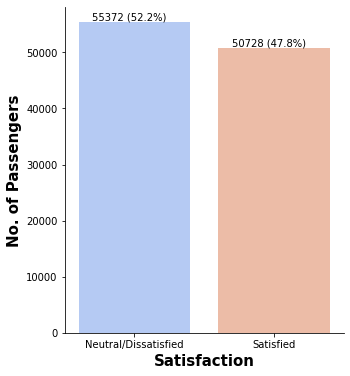

In [ ]:

fig=plt.figure(figsize=[5,6])
ax = sns.countplot(data=cust_df,x='satisfaction_v2',palette='coolwarm')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(cust_df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))

plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
sns.despine()

* Since we can't improve all services ,I only pick the one that has correlation to our satisfaction larger than 0.35: *Online Boarding, Seat comfort, Inflight Entertainment, Leg room and Cleanliness*


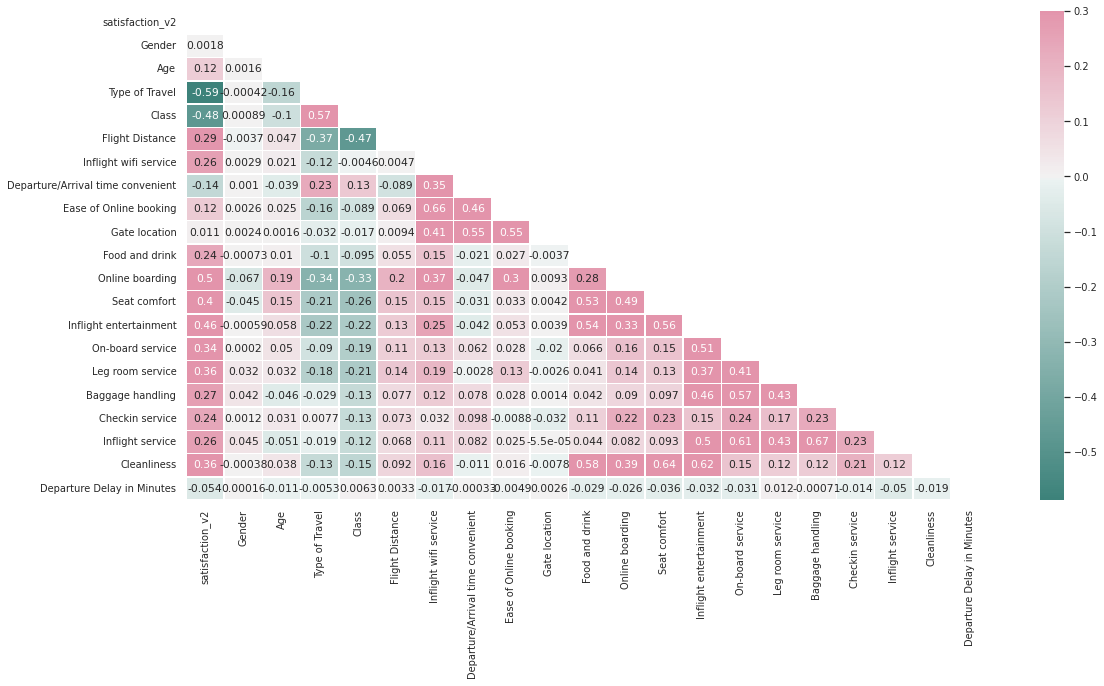

In [ ]:
sns.set(style='white',font_scale=.9)
# Compute the correlation matrix
corr = cust_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 9))

# # Generate a custom diverging colormap
cmap = sns.diverging_palette(180, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.3, center=0,linewidths=.5, annot=True)

* We can see that scores below 3 are the one we should take consideration since customer whose give 4-5 score usually give good feedbacks.
* Cleanliness seems to be our prior concerned right now since it has the highest number of neutral and dissatisfation customer.

In [ ]:
x=cust_df[['satisfaction_v2','Online boarding','Seat comfort','Inflight entertainment','Leg room service','Cleanliness']]
x = x.groupby('satisfaction_v2').mean().T
x

satisfaction_v2,0,1
Online boarding,2.735010,4.070533
Seat comfort,3.050441,4.072169
Inflight entertainment,2.843567,4.059711
Leg room service,2.932240,3.868889
Cleanliness,2.893719,3.820632


In [ ]:
x=cust_df[['Online boarding','Seat comfort','Inflight entertainment','Leg room service','Cleanliness']]
table=pd.DataFrame()
for each in x.columns:
  table[each]=x[each].value_counts()
table=table.sort_index()
#table
x1=table.iloc[0]+table.iloc[1]+table.iloc[2]+table.iloc[3]
x2=table.iloc[4]+table.iloc[5]
new_table=pd.DataFrame()
new_table['Dissatisfied/Neutral']=x1
new_table['Satisfied']=x2
new_table

,Dissatisfied/Neutral,Satisfied
Online boarding,48768,57332
Seat comfort,42746,63354
Inflight entertainment,47608,58492
Leg room service,49940,56160
Cleanliness,53563,52537


* One more factor to notice is that most of the neutral and bad feedbacks are mainly on flight that is less than 1500km. This could be short to medium distance flight.
* Our service should be improve in those flight to improve our quality of service significantly

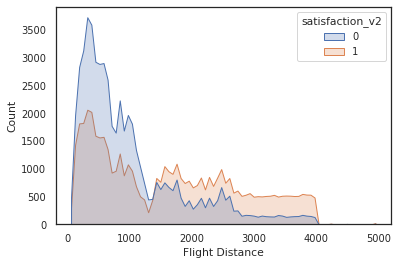

In [ ]:
sns.histplot(data=cust_df, x='Flight Distance',hue="satisfaction_v2", element="poly")

# Conclusion

* Decsion Tree model give accuracy of 0.945, compare to AdaBoost: 0.925 and Random Forest: 0.945, KNN Classifier: 0.76 and Logistic Regression : 0.87 .
* Decision Tree model can give quite accurate model with less time using since it's model is much more simple
* We can see the 5 most important features, that all have the heighest weight on all models, are: Online Boarding, Type of travel, Class, Inflight wifi service and Inflight Entertainment.
* Suggestion: Further analysis on those 5 features to find out what cause the highest dissatisfaction rate then we can improve
* Futher suggestion: Loyal Customer tent to give a lot neutral or dissatisfied feedback. We should take a look at this sub